# Linear Discriminant Analysis (LDA) Methodology 

##### Author information
- Name: Jeongin Yook 
- email address: 21900471@handong.ac.kr
- GitHub: jeongin777 
- Youtube URL: https://youtu.be/O7CkwnjIsZg 

#### Part 1. Brief background of methodology

Before LDA (Linear Discriminant Analysis) was introduced, researchers faced the challenge of classifying data into different classes. QDA (Quadratic Discriminant Analysis) existed, but it required complex computations and was inefficient when working with large datasets. PCA (Principal Component Analysis) was another popular method for dimensionality reduction, but it was not designed for classification.

In 1936, Ronald A. Fisher first introduced LDA. The basic concept of LDA is to maximize the distance between the means of different classes while minimizing the variance within each class. LDA is a mixture of statistical modeling and machine learning. From a statistical perspective, it uses variance and mean, while from a machine learning perspective, it's used for data classification. What distinguishes LDA from other classification algorithms is its assumption that the data follows a normal distribution and that the variance of the classes is identical.

<div style="display: flex; justify-content: space-around;">
    <figure>
        <img src="2d.png" alt="Figure 1" width="500"/> 
        <figcaption>Figure 1: Dataset of two classes with two features</figcaption>
    </figure>
    <figure>
        <img src="1d.png" alt="Figure 2" width="500"/>
        <figcaption>Figure 2: Projection of dataset</figcaption>
    </figure>
</div>

In Figure 1, LDA helps us find the axis that best separates Class 1 and Class 2. The axis maximizes the distance between the means of each class and minimizes the variance within each class. The axis is determined by projecting the dataset onto a certain axis that best meets these conditions. In Figure 2, the dataset is projected onto the axis determined by LDA.

There are several benefits of using LDA. First, it assumes that the data has homoscedasticity, meaning that all classes have the same covariance matrix, which simplifies the calculations. LDA also reduces the dimensionality of the data by projecting high-dimensional data onto a lower-dimensional space. While it is similar to PCA, LDA focuses on class separability rather than variance maximization. Moreover, LDA can classify more than two classes and provides the best linear boundaries.

LDA can be used in any field that requires classification. For example, it can be applied to medical diagnosis by classifying patients based on medical data, image recognition by projecting facial features onto a lower-dimensional space, credit scoring, and fraud detection by classifying financial indicators.


#### Part 2. Key concept of methodology

Suppose there are given data point $\vec{x}$, and $w$ is the discriminant vector that best separate the different classes, $y$ is a scalar value that obtained by projecting $\vec{x}$ onto $w$. It can be expressed as: $$y = \vec{w}^T \vec{x}$$ 

Suppose data has two classes $C_1$ and $C_2$, and the number of points are $N_1$ and $N_2$. The mean vectors of each classes are $m_1$ and $m_2$. It can be expressed as: $$m_1 = \frac{1}{N_1} \sum_{n \in C_1} \vec{x_n} \\ m_2 = \frac{1}{N_2} \sum_{n \in C_2} \vec{x_n}$$ 

The purpose is to maximize the distance between two class means when projected onto $\vec{w}$. The relationship between two class means and the projection vector $\vec{w}$ can be expressed as: $$m_2 - m_1 = w^T(m_2 - m_1) \\ m_k = w^T m_k$$ 

After projecting the data onto $\vec{w}$, the purpose is for the data within each class to be close to the each classes' mean. It means variance of each class is to be minimized and the variance can be expressed as: $$s_k^2 = \sum_{n \in C_k} (y_n - m_k)^2$$ 

The goal of LDA is to maximize the distance of each between class means and minimize the variance of each class. It can be expressed as an objective function. $$J(w) = \frac{(m_1 - m_2)^2}{s_1^2 + s_2^2}$$ 
This can be expressed in a matrix form using $S_B$ and $S_W$. $$J(w) = \frac{w^T S_B w}{w^T S_W w}$$ 

$S_B$ represents between-class scatter matrix and $S_W$ represents within-class scatter matrix. 
$$ S_B = (m_1 - m_2)(m_1 - m_2)^T $$ 

$$ S_W = \sum_{n \in C_1} (x_n - m_1)(x_n - m_1)^T + \sum_{n \in C_2} (x_n - m_2)(x_n - m_2)^T $$ 

To maximize the objective function $J(w)$, the derivative of $J(w)$ with respect to $w$ have to be $0$. At this point, $S_B$ and $S_W$ are symmetric marix. 
$$ \frac{d}{dw} (w^T S_B w) = 2 S_B w $$ 

$$ \frac{d}{dw} (w^T S_W w) = 2 S_W w $$ 

$$ \begin{aligned} \frac{d}{dw} J(w) &= \frac{2 S_Bw \cdot (w^T S_W w) - (w^T S_B w) \cdot 2 S_Ww}{(w^T S_W w)^2}
\\ &= \frac{2 (w^T S_W w \cdot S_B w - w^T S_B w \cdot S_W w )}{( w^T S_W w)^2} \end{aligned}$$ 

$$ w^T S_W w \cdot S_B w - w^T S_B w \cdot S_W w = 0 $$ 

$$ w^T S_W w \cdot S_B w = w^T S_B w \cdot S_W w $$ 

Since $w^T S_W w$ and $w^T S_B w$ are scalar value, this equation can be simplified as: 

$$ S_B w = \lambda S_W w $$ 

Again this equation can be written as: 

$$ S_W^{-1}S_B w = \lambda w $$ 

This equation represents a generalized eigenvalue problem, where $\lambda$ is the eigenvalue corresponding to the eigenvector $w$. 
We can find $w$ by eigenvalue decomposition, and the eigenvector $w$ that corresponding to the largest eigenvalue $\lambda$ is the best direction that maximizes the separation between the classes. 


#### Part 3. Example

In [28]:
#Import necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score 

In [29]:
iris = pd.read_csv("iris_dataset.csv") # Load iris dataset
X = iris.drop(columns="species")  # Features 
y = iris["species"]  # Class labels 

X, y.unique() 

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 array(['setosa', 'versic

In [30]:
# Split the dataset into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature (mean=0, variance=1) 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LDA : fit the model and transform the data 
lda = LDA(n_components=2) # reduce dimensions to 2 for visualization 
lda.fit(X_train_scaled, y_train) 
X_train_lda = lda.transform(X_train_scaled) 

# Predict the accuracy of LDA model 
y_pred = lda.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred) 
print(f"Accuracy: {accuracy * 100:.2f}%") 


Accuracy: 100.00%


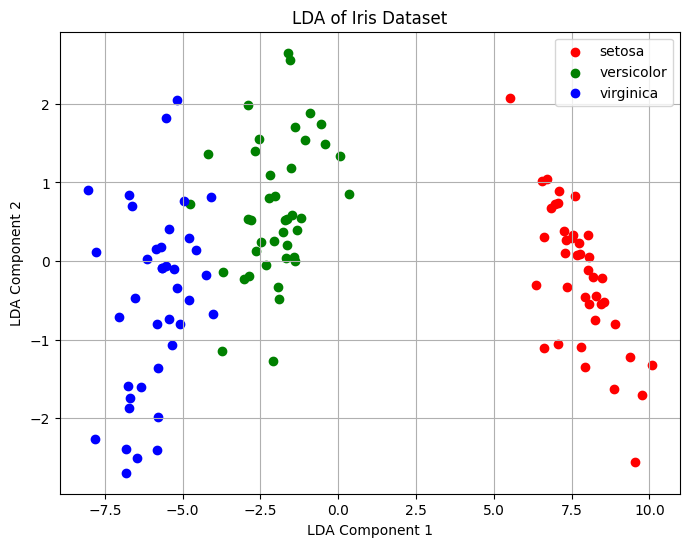

In [31]:
# Plotting the results in 2D
plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b']

for label, color in zip(np.unique(y_train), colors):
    plt.scatter(X_train_lda[y_train == label, 0], 
                X_train_lda[y_train == label, 1], 
                color=color, 
                label=label)

plt.title('LDA of Iris Dataset')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(loc='best')
plt.grid()
plt.show()


### Reference 

* https://ratsgo.github.io/machine%20learning/2017/03/21/LDA/ 
* https://maloveforme.tistory.com/m/228 